# <center>PIPELINE</center>

## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import tqdm
import os
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

## 2. Load dataframes

In [2]:
file_amazon = 'output_01_data_01_AM_mun_especie.csv'
path_input_file_amazon = os.path.join(os.getcwd(), '..', 'sprint_03_data_analysis', 'output', file_amazon)
df_amazon = pd.read_csv(path_input_file_amazon, delimiter=';')
del df_amazon['Unnamed: 0']
df_amazon.head()

,CD,Municipio,Falciparum,Mista,Vivax,Malarie,Ovale,Ano,Estado
0,110001,Alta Floresta D'Oeste,15.000,5.0,117.000,0,0,2003,RO
1,110002,Ariquemes,2.329,138.0,4.801,0,0,2003,RO
2,110003,Cabixi,178.000,0.0,54.000,0,0,2003,RO
3,110004,Cacoal,137.000,9.0,279.000,0,0,2003,RO
4,110005,Cerejeiras,57.000,6.0,104.000,0,0,2003,RO


In [3]:
file_covid = 'output_02_data_02_covid_cities_confirmed_cases.csv'
path_input_file_covid = os.path.join(os.getcwd(), '..', 
                                     'sprint_03_data_analysis', 'output', 
                                     file_covid)
df_covid = pd.read_csv(path_input_file_covid, delimiter=';')
del df_covid['Unnamed: 0']
df_covid.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-05-02,18,22945.0,1.0,1,0,0,NaN,NaN,0.0
1,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-05-03,19,22945.0,1.0,0,0,0,NaN,NaN,0.0
2,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-05-04,19,22945.0,1.0,0,0,0,NaN,NaN,0.0
3,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-05-05,19,22945.0,1.0,0,0,0,NaN,NaN,0.0
4,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-05-06,19,22945.0,1.0,0,0,0,NaN,NaN,0.0


In [4]:
file_malarie_covid_total = 'Covid_malaria_total_casos.csv'
path_input_file_malarie = os.path.join(os.getcwd(), '..', 
                                       'sprint_01_data_collection', 
                                       'data_04', 
                                       file_malarie_covid_total)
df_malarie_covid_total = pd.read_csv(path_input_file_malarie)
df_malarie_covid_total.head()

,CD,Municipio.x,Populacao_2020,numeroLeitos,Ano,casos COVID/1000,Casos_COVID_Acumulados,obitos COVID/1000,Obitos_COVID_Acumulados,CFR,CasosAMazonia_Malaria,CasosAmazoniaAcumulados_Malaria,PF,PV,casos_Falciparum,caso_Vivax
0,110001,Alta Floresta D'Oeste,22728,49,2020,"56,6701865540303",1288,"0,703977472720873",16,"0,012422360248447",0,0,0,"0,351988736360436",0,8
1,110002,Ariquemes,109523,256,2020,"71,8570528564776",7870,"1,2234873040366",134,"0,01702668360864",59,521,"0,228262556723245","4,48307661404454",25,491
2,110003,Cabixi,5188,9,2020,"36,0447185813416",187,"1,15651503469545",6,"0,032085561497326",0,0,0,0,0,0
3,110004,Cacoal,85893,360,2020,"47,0934767676062",4045,"0,66361635988963",57,"0,014091470951792",7,122,"0,023284784557531","1,38544468117309",2,119
4,110005,Cerejeiras,16204,40,2020,"19,809923475685",321,"0,431992100715873",7,"0,021806853582555",1,9,0,"0,493705257960997",0,8


# <center>FINAL ANALYSIS</center>

## <center> 01: CFM | CFV</center>

### CFM = n° cases malária / population, by city
### CFC = n° deaths covid X ( n° beds / population ²), by city

#### CFM

In [5]:
df_amazon.drop_duplicates(subset=['CD'])['CD'].shape

(707,)

In [22]:
df_amazon[df_amazon['Ano'].isin([2020])].drop_duplicates(subset=['CD'])['CD'].shape

(361,)

In [7]:
df_amazon_by_city_sum_all_plasmodium_species_2020 = pd.DataFrame(
    df_amazon[df_amazon['Ano'].isin([2020])].groupby(['CD']).agg(
        {'Vivax': ['sum'], 
         'Falciparum': ['sum'], 
         'Malarie': ['sum'], 
         'Ovale': ['sum'], 
         'Mista': ['sum']}).drop('Total geral').sum(axis=1), 
    columns=['sum_all_plasmodium_species'])

df_amazon_by_city_sum_all_plasmodium_species_2020

,sum_all_plasmodium_species
CD,
110001,8.0
110002,521.0
110004,122.0
110005,9.0
110006,1.0
...,...
510787,2.0
510790,11.0
510792,6.0


In [8]:
df_covid['codmun'] = df_covid['codmun'].map(str).map(lambda codmun: codmun.split('.')[0])

In [9]:
df_sum_all_plasmodium_species_population_by_city_2020 = pd.merge(
    left=df_amazon_by_city_sum_all_plasmodium_species_2020.reset_index().rename(
        columns={'CD': 'codmun'}),
    right=df_covid[['codmun', 'populacaoTCU2019']].drop_duplicates(subset=['codmun']),
    on='codmun').set_index('codmun')

df_sum_all_plasmodium_species_population_by_city_2020

,sum_all_plasmodium_species,populacaoTCU2019
codmun,,
110001,8.0,22945.0
110002,521.0,107863.0
110004,122.0,85359.0
110005,9.0,16323.0
110006,1.0,15882.0
...,...,...
510787,2.0,25881.0
510790,11.0,142996.0
510792,6.0,90313.0


In [23]:
df_amazon_CFM_by_city = pd.DataFrame(df_sum_all_plasmodium_species_population_by_city_2020['sum_all_plasmodium_species'] / \
            df_sum_all_plasmodium_species_population_by_city_2020['populacaoTCU2019'], columns=['CFM'])

df_amazon_CFM_by_city

,CFM
codmun,
110001,0.000349
110002,0.004830
110004,0.001429
110005,0.000551
110006,0.000063
...,...
510787,0.000077
510790,0.000077
510792,0.000066


#### CFC_DEATHS = (n° deaths / population), by city

In [24]:
df_covid[['estado', 'codmun', 'populacaoTCU2019']].drop_duplicates().head()

,estado,codmun,populacaoTCU2019
0,RO,110001,22945.0
385,RO,110002,107863.0
792,RO,110003,5312.0
1144,RO,110004,85359.0
1531,RO,110005,16323.0


In [28]:
df_covid_sum_population_by_city = df_covid[['codmun', 'populacaoTCU2019']].drop_duplicates().groupby(
    by='codmun').agg(
    {'populacaoTCU2019': 'sum'})

df_covid_sum_population_by_city

,populacaoTCU2019
codmun,
110001,22945.0
110002,107863.0
110003,5312.0
110004,85359.0
110005,16323.0
...,...
522200,13863.0
522205,8743.0
522220,6171.0


In [27]:
df_covid_sum_deaths_by_city = df_covid[['codmun', 'obitosNovos']].groupby(['codmun']).agg(
    {'obitosNovos': ['sum']})

df_covid_sum_deaths_by_city

,obitosNovos
,sum
codmun,
110001,61
110002,421
110003,18
110004,236
110005,55
...,...
522200,20
522205,21


In [48]:
# way 01

# df_covid_CFC_DEATHS_by_city = pd.DataFrame(df_covid_sum_deaths_by_city['obitosNovos']['sum'] / \
# df_covid_sum_population_by_city['populacaoTCU2019'], columns=['CFC_DEATHS'])

# df_covid_CFC_DEATHS_by_city

# way 02

df_sum_deaths_sum_population_by_city = df_covid_sum_deaths_by_city.join(df_covid_sum_population_by_city)

df_covid_CFC_DEATHS_by_city = pd.DataFrame(
    (df_sum_deaths_sum_population_by_city[('obitosNovos', 'sum')] / \
     df_sum_deaths_sum_population_by_city['populacaoTCU2019']),
    columns=['CFC_DEATHS'])

del df_sum_deaths_sum_population_by_city

df_covid_CFC_DEATHS_by_city

/home/bruno/Documents/dev/lgdc-covid-19-and-malaria/venv-lgdc-covid-19-and-malaria/lib/python3.8/site-packages/pandas/core/reshape/merge.py:648: UserWarning:

merging between different levels can give an unintended result (2 levels on the left,1 on the right)



,CFC_DEATHS
codmun,
110001,0.002659
110002,0.003903
110003,0.003389
110004,0.002765
110005,0.003369
...,...
522200,0.001443
522205,0.002402
522220,0.000648


#### CFC_BEDS = (n° beds / population), by city

In [50]:
# way 01

# df_covid_CFC_BEDS_by_city = pd.DataFrame(df_malarie_covid_total['numeroLeitos'] / \
#              df_malarie_covid_total['Populacao_2020'],
#             columns=['CFC_BEDS']).set_index(df_malarie_covid_total['CD'])

# df_covid_CFC_BEDS_by_city = df_covid_CFC_BEDS_by_city.reset_index().rename(columns={'CD': 'codmun'}).set_index('codmun')
# df_covid_CFC_BEDS_by_city.index = df_covid_CFC_BEDS_by_city.index.map(str).map(lambda codmun: codmun.split('.')[0])
# df_covid_CFC_BEDS_by_city

# way 02

try:
    df_malarie_covid_total['CD'] = df_malarie_covid_total['CD'].map(str).map(
        lambda x: x.split(',')[0])

    df_malarie_covid_total.rename(columns={'CD': 'codmun'}, inplace=True)

    df_malarie_covid_total.set_index('codmun', inplace=True)

except KeyError as e:
    print('Already changed from CD to codmun')
    

df_temp = df_malarie_covid_total[['numeroLeitos']].join(
    df_covid[['populacaoTCU2019', 'codmun']].set_index('codmun'), how='left').reset_index().drop_duplicates(
    subset=['codmun']).set_index('codmun')

df_covid_CFC_BEDS_by_city = pd.DataFrame(df_temp['numeroLeitos'] / df_temp['populacaoTCU2019'], columns=['CFC_BEDS'])

del df_temp

df_covid_CFC_BEDS_by_city

Already changed from CD to codmun


,CFC_BEDS
codmun,
110001,0.002136
110002,0.002373
110003,0.001694
110004,0.004217
110005,0.002451
...,...
522200,0.002885
522205,0.001830
522220,0.002107


In [52]:
df_covid_CFC_by_city = pd.merge(
    left=df_covid_CFC_DEATHS_by_city[['CFC_DEATHS']],
    right=df_covid_CFC_BEDS_by_city[['CFC_BEDS']],
    on='codmun')

df_covid_CFC_by_city

,CFC_DEATHS,CFC_BEDS
codmun,,
110001,0.002659,0.002136
110002,0.003903,0.002373
110003,0.003389,0.001694
110004,0.002765,0.004217
110005,0.003369,0.002451
...,...,...
522200,0.001443,0.002885
522205,0.002402,0.001830
522220,0.000648,0.002107


### Join CFC and CFM

In [64]:
def normalize(_df, columns: list = None):
    
    _df = _df.copy()
    
    if columns is None:
        columns = _df.columns
        
    for column in columns:
        val_max = _df[column].max()
        val_min = _df[column].min()
        _df[column] = _df[column].apply(lambda x: (x -  val_min) / (val_max - val_min))
    
    return _df


In [53]:
df_CF_by_city = df_amazon_CFM_by_city.join(df_covid_CFC_by_city)
df_CF_by_city

# df_CF_by_city = normalize(df_CF_by_city, ['CFM', 'CFC_DEATHS', 'CFC_BEDS'])

df_CF_by_city

,CFM,CFC_DEATHS,CFC_BEDS
codmun,,,
110001,0.000349,0.002659,0.002136
110002,0.004830,0.003903,0.002373
110004,0.001429,0.002765,0.004217
110005,0.000551,0.003369,0.002451
110006,0.000063,0.001889,0.003148
...,...,...,...
510787,0.000077,0.001623,0.002048
510790,0.000077,0.002560,0.001895
510792,0.000066,0.001960,0.002203


In [56]:
path_output = os.path.join(os.getcwd(), 'output')

df_CF_by_city.to_csv(os.path.join(path_output, 'data', 'output_01_CFs_by_city.csv'))

### <center>Visualization</center>

In [58]:
sns.set(rc={'figure.figsize': (10, 10)})
# sns.set_theme(style="white")

#### 01. distplots

<AxesSubplot:ylabel='Count'>

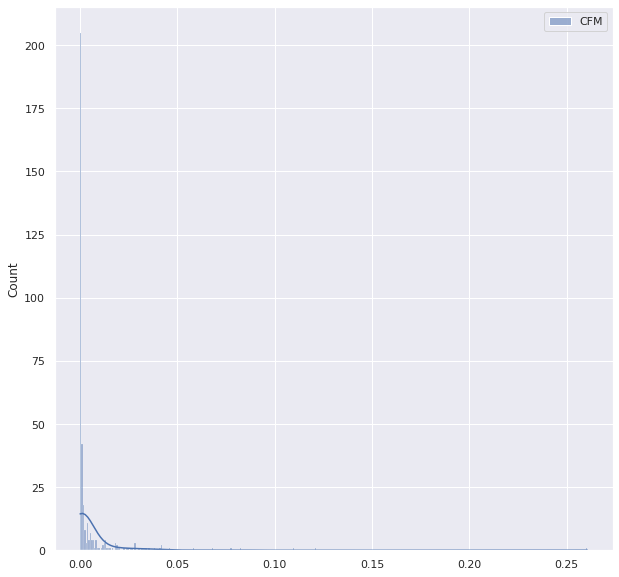

In [59]:
sns.histplot(df_CF_by_city[['CFM']], kde=True)

<AxesSubplot:ylabel='Count'>

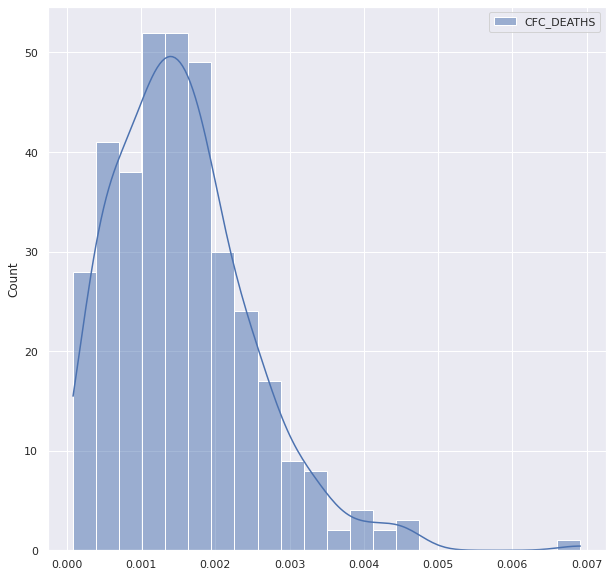

In [60]:
sns.histplot(df_CF_by_city[['CFC_DEATHS']], kde=True)

<AxesSubplot:ylabel='Count'>

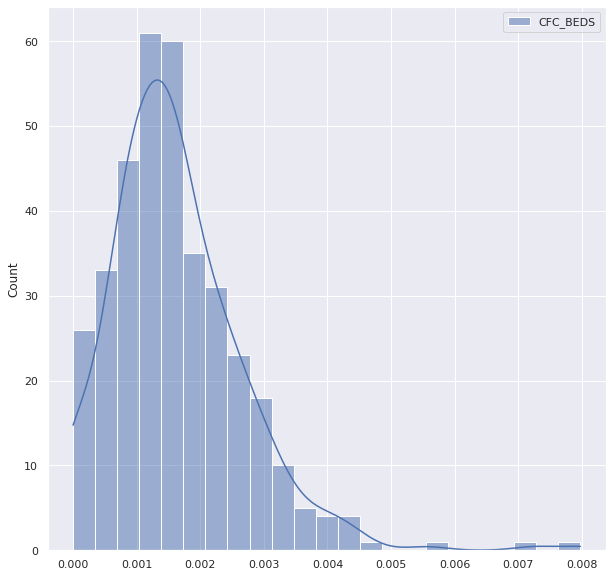

In [61]:
sns.histplot(df_CF_by_city[['CFC_BEDS']], kde=True)

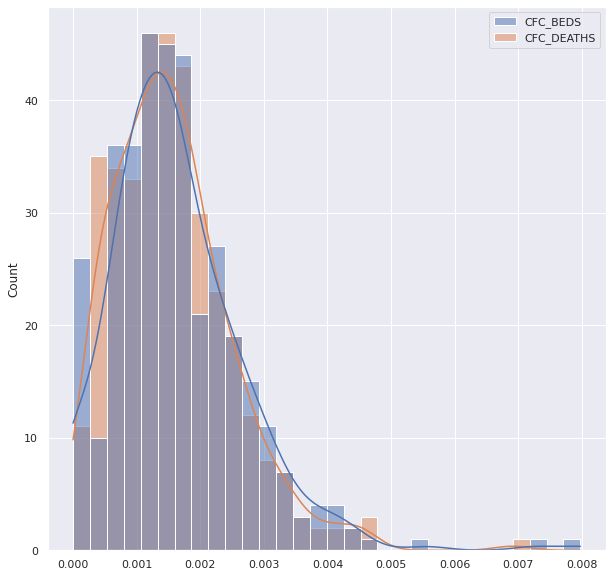

In [62]:
sns.histplot(df_CF_by_city[['CFC_BEDS', 'CFC_DEATHS']], kde=True)
plt.savefig(os.path.join(path_output, 'final_01.png'), dpi=300)

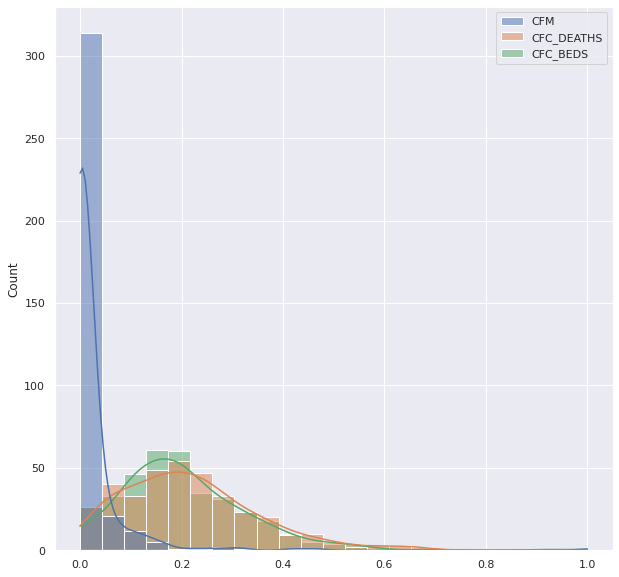

In [65]:
sns.histplot(normalize(df_CF_by_city), kde=True)
plt.savefig(os.path.join(path_output, 'final_02.png'), dpi=300)

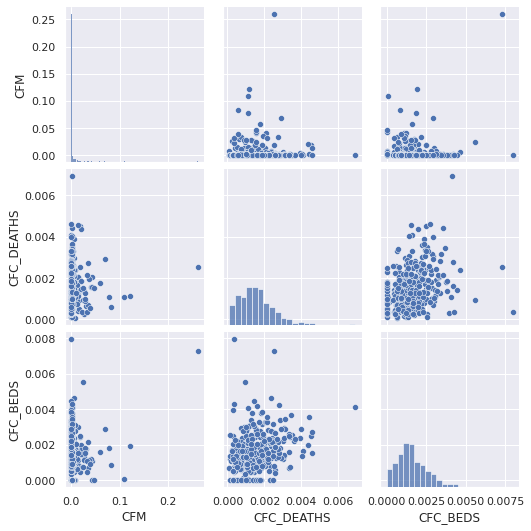

In [66]:
sns.pairplot(data=df_CF_by_city)
plt.savefig(os.path.join(path_output, 'final_03.png'), dpi=300)

<AxesSubplot:ylabel='Density'>

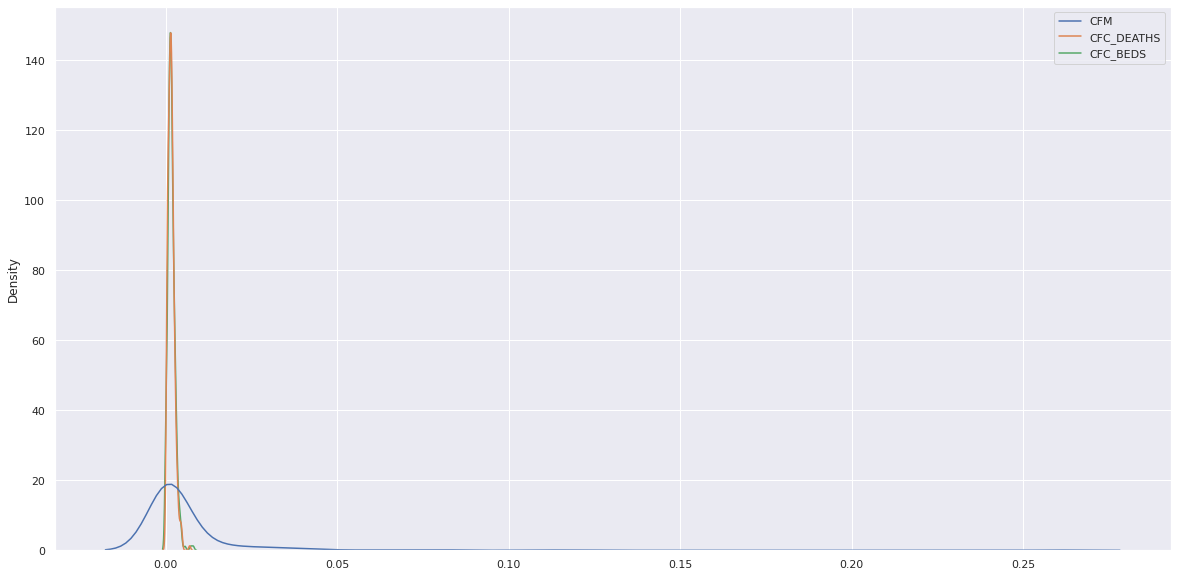

In [67]:
sns.set(rc={'figure.figsize': (20, 10)})

sns.kdeplot(data=df_CF_by_city)

<AxesSubplot:ylabel='Density'>

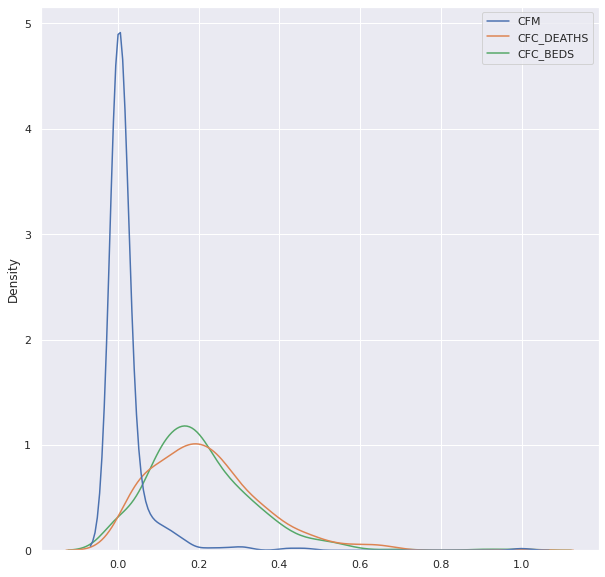

In [68]:
sns.set(rc={'figure.figsize': (10, 10)})

sns.kdeplot(data=normalize(df_CF_by_city))

#### 02. categorical

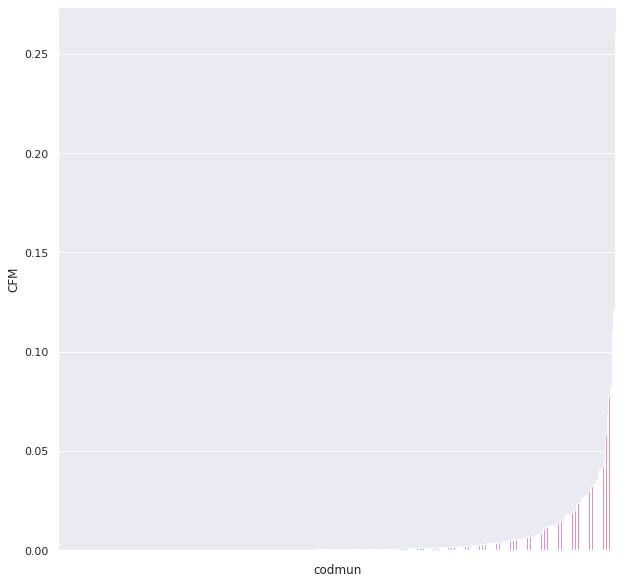

In [69]:
sns.barplot(
    data=df_CF_by_city.reset_index().sort_values(by='CFM'), 
    x='codmun', y='CFM').set(xticklabels=[])

print()
plt.savefig(os.path.join(path_output, 'final_04.png'), dpi=300)

# <center>Questions</center>

## Question 01: there is correlaction between deaths and beds?

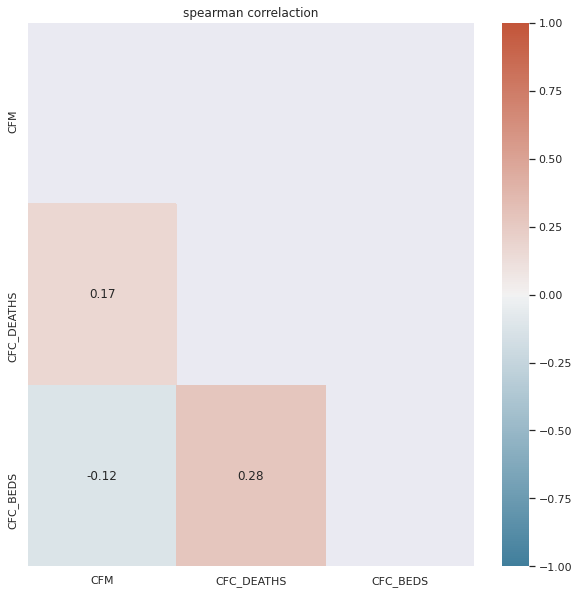

In [70]:
corr = df_CF_by_city.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data=corr, cmap=cmap, mask=mask, center=0, vmax=1, vmin=-1, annot=True)
plt.title('spearman correlaction')
plt.savefig(os.path.join(path_output, 'final_05.png'), dpi=300)

## Question 02: how about corerlaction in/out endemic malaric cities?

In [71]:
print(df_CF_by_city['CFM'].mean())
print(df_CF_by_city['CFM'].std())

0.005743953535803708
0.01908943359764969


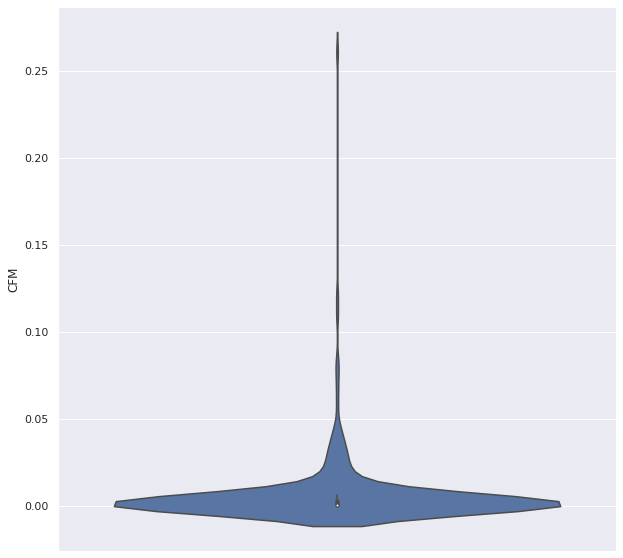

In [72]:
sns.violinplot(data=df_CF_by_city, y='CFM')
plt.savefig(os.path.join(path_output, 'final_06.png'), dpi=300)

In [73]:
mean_CFM = df_CF_by_city['CFM'].mean()

df_CF_by_city_CFM_greather_than_mean = df_CF_by_city[df_CF_by_city['CFM'] >= mean_CFM]
df_CF_by_city_CFM_greather_than_mean

,CFM,CFC_DEATHS,CFC_BEDS
codmun,,,
110008,0.018493,0.001473,0.002455
110010,0.018517,0.004526,0.002469
110013,0.013053,0.002025,0.001200
110094,0.016895,0.001428,0.000436
110110,0.006980,0.001721,0.001912
...,...,...,...
160050,0.019289,0.001467,0.001503
160053,0.028538,0.001001,0.001547
510325,0.024027,0.001529,0.000726


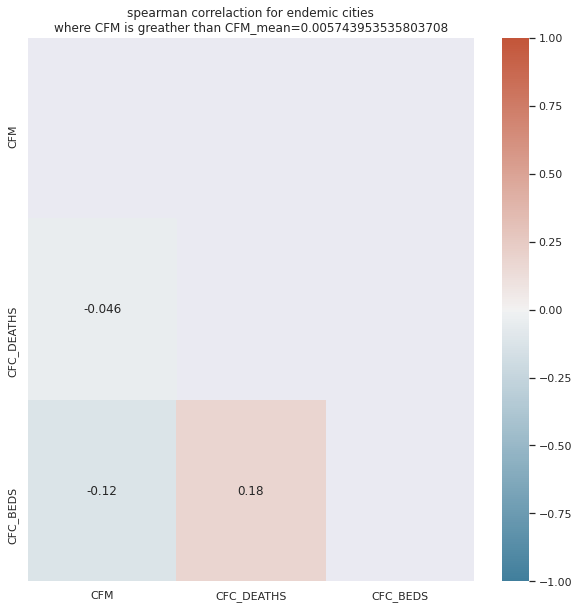

In [74]:
corr = df_CF_by_city_CFM_greather_than_mean.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data=corr, cmap=cmap, mask=mask, center=0, vmax=1, vmin=-1, annot=True)
plt.title(f'spearman correlaction for endemic cities\nwhere CFM is greather than CFM_mean={mean_CFM}')
plt.savefig(os.path.join(path_output, 'final_07.png'), dpi=300)

In [ ]:
# outside

In [75]:
mean_CFM = df_CF_by_city['CFM'].mean()

df_CF_by_city_CFM_less_than_mean = df_CF_by_city[df_CF_by_city['CFM'] < mean_CFM]
df_CF_by_city_CFM_less_than_mean

,CFM,CFC_DEATHS,CFC_BEDS
codmun,,,
110001,0.000349,0.002659,0.002136
110002,0.004830,0.003903,0.002373
110004,0.001429,0.002765,0.004217
110005,0.000551,0.003369,0.002451
110006,0.000063,0.001889,0.003148
...,...,...,...
510787,0.000077,0.001623,0.002048
510790,0.000077,0.002560,0.001895
510792,0.000066,0.001960,0.002203


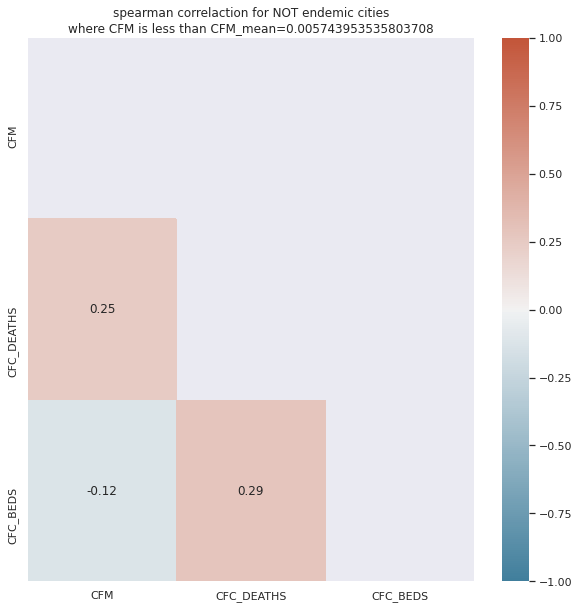

In [76]:
corr = df_CF_by_city_CFM_less_than_mean.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(data=corr, cmap=cmap, mask=mask, center=0, vmax=1, vmin=-1, annot=True)

plt.title(f'spearman correlaction for NOT endemic cities\nwhere CFM is less than CFM_mean={mean_CFM}')
plt.savefig(os.path.join(path_output, 'final_08.png'), dpi=300)